# Plot Results into Scatter Plot and Histogram

In [290]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import root_mean_squared_error, mean_absolute_error, r2_score
from scipy.stats import kendalltau, pearsonr

In [ ]:
# Load the data
# file_path = "best-mlp-model-test-output.csv"
file_path = "best-gru-model-test-output.csv"
# file_path = "stoi-pystoi-test-output.csv"
data = pd.read_csv(file_path)

In [ ]:
# Normalize the values to be in percentage (0-100)
ref = data['Ground Truth'] * 100  # True correctness percentage
tst = data['Predictions'] * 100   # Predicted correctness percentage

In [293]:
# Compute metrics
rmse = root_mean_squared_error(ref, tst)
mae = mean_absolute_error(ref, tst)
r2 = r2_score(ref, tst)
tau, _ = kendalltau(ref, tst)
cc, _ = pearsonr(ref, tst)

# Print the metrics
print(f"RMSE: {rmse:.4f}")
print(f"CC: {cc:.4f}")
print(f"Tau: {tau:.4f}")
print(f"MAE: {mae:.4f}")
print(f"R2: {r2:.4f}")

RMSE: 29.9946
CC: 0.6127
Tau: 0.3995
MAE: 24.2179
R2: 0.3202


## Scatter Plot

In [294]:
plt.ioff()  # Turn off automatic display

In [295]:
# Create a square figure (8x8 inches)
plt.figure(figsize=(6, 6))

# Plot the data points as dots
plt.plot(
    ref, 
    tst, 
    ".", 
    # color="blue"
)

In [296]:
# Make a trendline
# Overlay a smoothed trend line using LOWESS smoothing with Seaborn's regplot
sns.regplot(
    x=ref,
    y=tst,
    scatter=False,              # Do not replot scatter points
    lowess=True,                # Enable LOWESS smoothing
    ci=None,                    # Disable confidence interval shading
    color="#646464",      # Alternate to rgb, use #646464 color codes or just color names
    line_kws={"linestyle": "--", "linewidth": 2}
)

<Axes: xlabel='Ground Truth', ylabel='Predictions'>

In [297]:
# Formatting the plot
plt.xlabel('True [%]', fontweight='bold')
plt.ylabel('Predicted [%]', fontweight='bold')
plt.title(f'True vs. Predicted Speech Intelligibility', fontweight='bold')

# Optionally, set the x and y limits to ensure both axes range from 0 to 100
plt.xlim(-1, 101)
plt.ylim(-1, 101)

# Set the aspect ratio of the plot to be equal
plt.gca().set_aspect('equal', adjustable='box')

In [ ]:
# Save the plot as svg and png
# plt.savefig("true_vs_predicted.svg")
# plt.savefig("true_vs_predicted.png")

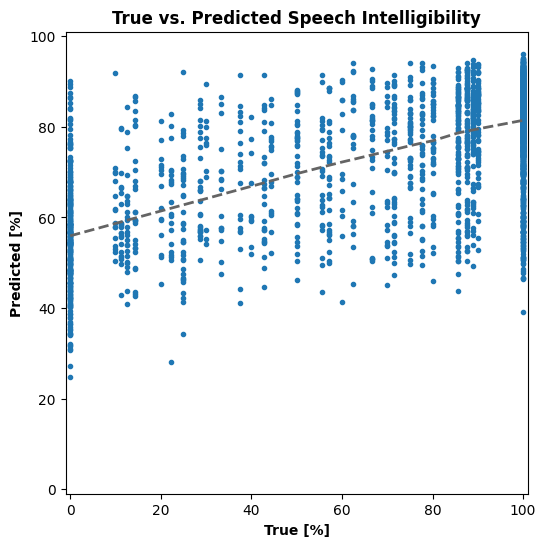

In [299]:
# Show the plot
plt.show()

## Histogram

In [300]:
# Create a figure with two subplots side-by-side
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

In [301]:
# Set up the colormap
cmap = plt.colormaps.get_cmap("viridis")

In [302]:
# First subplot
ax = axes[0]
# Compute the histogram for predicted values
hist_values_pred, bin_edges_pred, patches_pred = ax.hist(
    tst, bins=30, density=False, edgecolor='black'
)

# Normalize and color each bar in the predicted histogram
norm_pred = plt.Normalize(vmin=min(hist_values_pred), vmax=max(hist_values_pred))
for patch, value in zip(patches_pred, hist_values_pred):
    patch.set_facecolor(cmap(norm_pred(value)))

# Labeling and title for predicted histogram
ax.set_xlabel('Predicted Intelligibility [%]', fontweight='bold')
ax.set_ylabel('Number of Occurrences', fontweight='bold')
ax.set_title('Distribution of Predicted Intelligibility', fontweight='bold')

Text(0.5, 1.0, 'Distribution of Predicted Intelligibility')

In [303]:
ax = axes[1]
# Compute the histogram for true values
hist_values_true, bin_edges_true, patches_true = ax.hist(
    ref, bins=30, density=False, edgecolor='black'
)

# Normalize and color each bar in the true histogram
norm_true = plt.Normalize(vmin=min(hist_values_true), vmax=max(hist_values_true))
for patch, value in zip(patches_true, hist_values_true):
    patch.set_facecolor(cmap(norm_true(value)))

# Labeling and title for true histogram
ax.set_xlabel('True Intelligibility [%]', fontweight='bold')
ax.set_ylabel('Number of Occurrences', fontweight='bold')
ax.set_title('Distribution of True Intelligibility', fontweight='bold')

Text(0.5, 1.0, 'Distribution of True Intelligibility')

In [304]:
# Find largest value in both histograms
max_value = max(max(hist_values_pred), max(hist_values_true))
print(f"Max value: {max_value}")

# Set axes limits to be the same for both subplots
axes[0].set_xlim(-1, 101)
axes[0].set_ylim(0, max_value+10)
axes[1].set_xlim(-1, 101)
axes[1].set_ylim(0, max_value+10)

Max value: 1152.0


(0.0, 1162.0)

In [305]:
# Save the plot as svg and png
# plt.savefig("histograms.svg", format="svg", bbox_inches="tight")
# plt.savefig("true_vs_predicted.png")

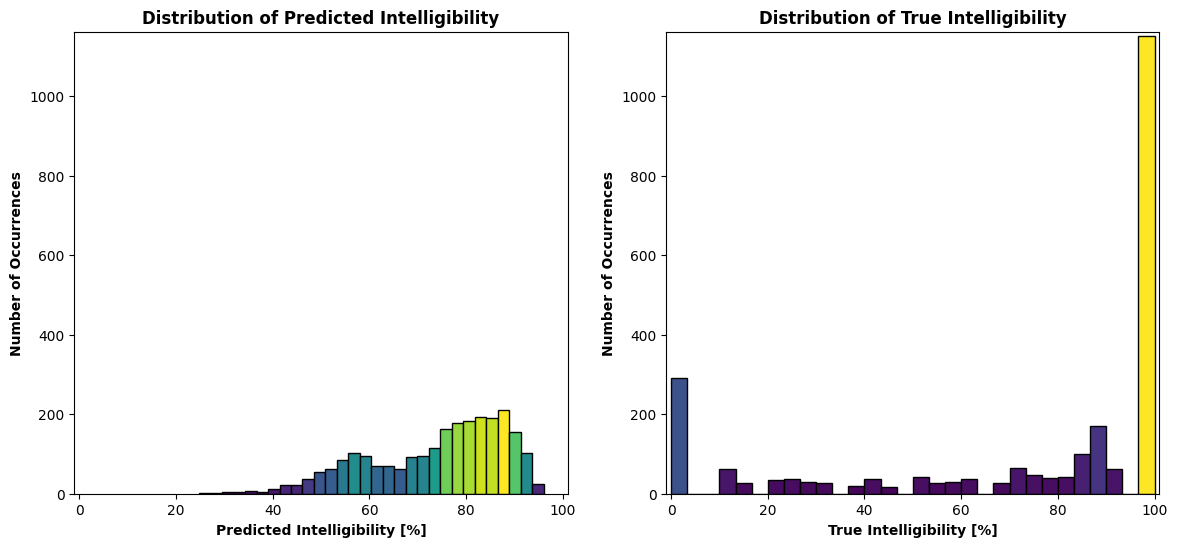

In [306]:
# Adjust layout and display the plot
# plt.tight_layout()
plt.show()